KHADAR_VALLI MILESTONE_2



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.9/35.9 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 20.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.16.1 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.5 which is incompatible.


In [ ]:
import cv2
import mediapipe as mp
import os
import shutil
import hashlib

# Initialize Mediapipe Hands
mp_hands = mp.solutions.hands
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)

# Paths for input and output directories
grayscale_dir = '/content/drive/MyDrive/sign_language_recog/archive/grayscale_videos'
hand_detected_dir = '/content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames'

# Create output directory if it doesn't exist
if not os.path.exists(hand_detected_dir):
    os.makedirs(hand_detected_dir)

# Process each folder in the grayscale directory
for folder_name in os.listdir(grayscale_dir):
    folder_path = os.path.join(grayscale_dir, folder_name)
    if os.path.isdir(folder_path):
        # Create a corresponding folder in the output directory
        output_folder = os.path.join(hand_detected_dir, folder_name)
        os.makedirs(output_folder, exist_ok=True)

        has_landmarks = False  # Track if any image in this folder has landmarks
        hashes = set()  # Store image hashes to check for duplicates

        # Process each image file in the folder
        for image_file in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_file)
            image_name = os.path.splitext(image_file)[0]  # Get file name without extension

            # Load the grayscale image
            gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if gray_image is None:
                print(f"Could not read image {image_path}")
                continue

            # Resize image to 255x255
            resized_image = cv2.resize(gray_image, (255, 255))

            # Enhance brightness and contrast for better detection
            alpha = 1.5  # Contrast control (1.0-3.0)
            beta = 50    # Brightness control (0-100)
            enhanced_image = cv2.convertScaleAbs(resized_image, alpha=alpha, beta=beta)

            # Convert grayscale to BGR for Mediapipe processing
            enhanced_bgr = cv2.cvtColor(enhanced_image, cv2.COLOR_GRAY2BGR)

            # Perform hand landmarks detection
            results = hands.process(cv2.cvtColor(enhanced_bgr, cv2.COLOR_BGR2RGB))
            if results.multi_hand_landmarks:
                has_landmarks = True  # At least one frame with landmarks in this folder
                for hand_landmarks in results.multi_hand_landmarks:
                    # Draw hand landmarks with red connections
                    mp.solutions.drawing_utils.draw_landmarks(
                        enhanced_bgr,
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        landmark_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=2),
                        connection_drawing_spec=mp.solutions.drawing_utils.DrawingSpec(color=(0, 0, 255), thickness=2)
                    )
                print(f"Hand landmarks detected in {image_file}")
            else:
                print(f"No hand landmarks detected in {image_file}")

            # Save the processed image with hand landmarks
            output_path = os.path.join(output_folder, f"{image_name}.jpg")
            cv2.imwrite(output_path, enhanced_bgr)
            print(f"Saved hand-detected image to {output_path}")

            # Check and delete duplicates
            with open(output_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
            if file_hash in hashes:
                os.remove(output_path)
                print(f"Duplicate found and removed: {output_path}")
            else:
                hashes.add(file_hash)

        # Delete folder if no frames with landmarks were detected
        if not has_landmarks:
            print(f"No landmarks detected in any frames for folder {folder_name}. Deleting folder...")
            shutil.rmtree(output_folder)

# Cleanup Mediapipe resources
hands.close()
print("Hand detection, normalization, and duplicate removal complete.")


No hand landmarks detected in crazy_frame_0000.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/crazy/crazy_frame_0000.jpg
No hand landmarks detected in crazy_frame_0001.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/crazy/crazy_frame_0001.jpg
No hand landmarks detected in crazy_frame_0002.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/crazy/crazy_frame_0002.jpg
No hand landmarks detected in crazy_frame_0003.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/crazy/crazy_frame_0003.jpg
No hand landmarks detected in crazy_frame_0004.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/crazy/crazy_frame_0004.jpg
No hand landmarks detected in crazy_frame_0005.png
Saved hand-detected image to /content/drive/MyDrive/si

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Streaming output truncated to the last 5000 lines.
No hand landmarks detected in with_frame_0012.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/with/with_frame_0012.jpg
No hand landmarks detected in with_frame_0013.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/with/with_frame_0013.jpg
No hand landmarks detected in with_frame_0014.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/with/with_frame_0014.jpg
No hand landmarks detected in with_frame_0015.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/with/with_frame_0015.jpg
No hand landmarks detected in with_frame_0016.png
Saved hand-detected image to /content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames/with/with_frame_0016.jpg
No hand landmarks detected in with_frame_0017.png
Saved hand-detected

In [ ]:
import tensorflow as tf
import os
import cv2
import numpy as np

# Directory paths
hand_detected_dir = '/content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames'
image_size = (255, 255)

# Label mapping dictionary
label_mapping = {folder_name: idx for idx, folder_name in enumerate(os.listdir(hand_detected_dir))}

# Define data generator function
def data_generator(batch_size):
    data, labels = [], []
    while True:
        for folder_name in os.listdir(hand_detected_dir):
            folder_path = os.path.join(hand_detected_dir, folder_name)
            label = label_mapping[folder_name]
            if os.path.isdir(folder_path):
                for image_file in os.listdir(folder_path):
                    image_path = os.path.join(folder_path, image_file)
                    image = cv2.imread(image_path)
                    if image is not None:
                        # Resize, normalize, and augment
                        image = cv2.resize(image, image_size) / 255.0
                        data.append(image)
                        labels.append(label)

                        # Augmentations
                        flipped_image = cv2.flip(image, 1)
                        data.append(flipped_image)
                        labels.append(label)

                        M = cv2.getRotationMatrix2D((image_size[1] // 2, image_size[0] // 2), 15, 1.0)
                        rotated_image = cv2.warpAffine(image, M, image_size)
                        data.append(rotated_image)
                        labels.append(label)

                    if len(data) >= batch_size:
                        yield np.array(data), np.array(labels)
                        data, labels = [], []

# Define datasets
train_dataset = tf.data.Dataset.from_generator(lambda: data_generator(32), output_signature=(
    tf.TensorSpec(shape=(None, 255, 255, 3), dtype=tf.float32),
    tf.TensorSpec(shape=(None,), dtype=tf.int32)))


In [ ]:
import tensorflow.keras

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),  # Adjust input shape as needed
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_mapping), activation='softmax')  # Output layer for classes
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',  # Optimizer
              loss='sparse_categorical_crossentropy',  # Loss function
              metrics=['accuracy'])  # Metrics to monitor


In [ ]:
import cv2
import os

# Define the path to the directory and image
hand_detected_dir = '/content/drive/MyDrive/sign_language_recog/archive/hand_detected_frames'
folder_name = os.listdir(hand_detected_dir)[0]  # Example: use the first folder
folder_path = os.path.join(hand_detected_dir, folder_name)

# Get the first image file in the folder
image_file = os.listdir(folder_path)[0]
image_path = os.path.join(folder_path, image_file)

# Load, resize, and normalize the image
image = cv2.imread(image_path)
if image is not None:
    image = cv2.resize(image, (255, 255))  # Resize to match model input
    normalized_image = image / 255.0       # Normalize to [0, 1]
    print("Image loaded, resized, and normalized successfully.")
else:
    print("Image could not be loaded.")


Image loaded, resized, and normalized successfully.


In [ ]:
# Print label mapping to verify
print(label_mapping)


{'crazy': 0, 'cousin': 1, 'dangerous': 2, 'deaf': 3, 'daily': 4, 'corn': 5, 'convince': 6, 'correct': 7, 'dark': 8, 'date': 9, 'cool': 10, 'dance': 11, 'country': 12, 'decorate': 13, 'count': 14, 'day': 15, 'dancer': 16, 'crave': 17, 'discuss': 18, 'depressed': 19, 'degree': 20, 'divide': 21, 'department': 22, 'my': 23, 'pursue': 24, 'sore throat': 25, 'german': 26, 'eternity': 27, 'procrastinate': 28, 'tornado': 29, 'hearing aid': 30, 'contact': 31, 'professor': 32, 'part': 33, 'study': 34, 'philosophy': 35, 'sleepy': 36, 'birth': 37, 'audience': 38, 'arm': 39, 'you': 40, 'weight': 41, 'odd': 42, 'ghost': 43, 'toilet': 44, 'lawyer': 45, 'milk': 46, 'a lot': 47, 'necklace': 48, 'monster': 49, 'peach': 50, 'skate': 51, 'educate': 52, 'switzerland': 53, 'special': 54}


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

# Step 3: Increase Model Complexity

# Define a more complex CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout for regularization
    tf.keras.layers.Dense(len(label_mapping), activation='softmax')  # Output layer for classification
])

# Display the model architecture
model.summary()

# Step 4: Reduce Learning Rate

# Compile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.0001),  # Reduce learning rate
              loss='sparse_categorical_crossentropy',  # Change to categorical if using one-hot encoding
              metrics=['accuracy'])

print("Model compiled successfully with a lower learning rate.")


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 55)                  │           7,095 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,818,167 (26.01 MB)

 Trainable params: 6,818,167 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

Model compiled successfully with a lower learning rate.


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 7s/step - accuracy: 0.2295 - loss: 3.9605 - val_accuracy: 1.0000 - val_loss: 3.3895
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.9349 - loss: 3.2714 - val_accuracy: 1.0000 - val_loss: 2.5878
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.9573 - loss: 2.3823 - val_accuracy: 1.0000 - val_loss: 1.4713
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 7s/step - accuracy: 0.9245 - loss: 1.5178 - val_accuracy: 1.0000 - val_loss: 0.4279
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.9781 - loss: 0.6394 - val_accuracy: 1.0000 - val_loss: 0.0486
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 6s/step - accuracy: 0.9787 - loss: 0.1403 - val_accuracy: 1.0000 - val_loss: 0.0034
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 1.0000 - loss: 0.0692 - val_accuracy: 1.0000 - val_loss: 1.9090e-04
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 1.0000 - loss: 0.0463 - val_accuracy: 1.0000 - val_loss: 1.0490e-05


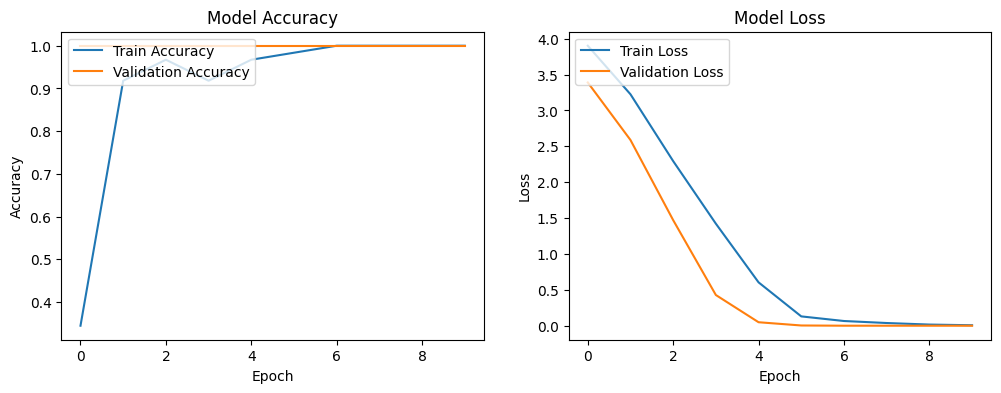

In [ ]:
# Step 6: Overfit on a Small Subset of the Data

# Create a small subset of the training data
small_data = train_data[:200]  # Adjust the number of samples as needed
small_labels = train_labels[:200]

# Fit the model on this small dataset
history = model.fit(small_data, small_labels, epochs=10, validation_split=0.2)

# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [ ]:
import os

# Check if the file exists
file_path = '/content/final_model.keras'
print("Does the file exist?", os.path.exists(file_path))  # Should print True if the file exists


Does the file exist? True


In [ ]:
# List all files in the /content directory
files_in_content = os.listdir('/content')
print("Files in /content:", files_in_content)


Files in /content: ['.config', 'label_encoder.pkl', 'final_model.h5', 'final_model.keras', 'drive', 'sample_data']


In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model(file_path)

# Print the model summary
loaded_model.summary()  # This will display the model architecture


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)                    │ (None, 253, 253, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 126, 126, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 124, 124, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       6,422,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 55)                  │           7,095 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,636,336 (52.02 MB)

 Trainable params: 6,818,167 (26.01 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,818,169 (26.01 MB)

In [ ]:
import os
import pandas as pd

# Define the main folder path
main_folder = 'New folder/handmodified'  # Change this to your folder path

# List to store folder data
data = []

# Traverse the main folder
for subdir, _, files in os.walk(main_folder):
    # Get the parent folder name
    parent_folder = os.path.basename(main_folder)
    # Get the subfolder name
    subfolder = os.path.basename(subdir)
    # Get the full path for each file
    for file in files:
        file_path = os.path.join(subdir, file)
        data.append({
            'S.no': len(data) + 1,
            'Parent folder': parent_folder,
            'Subfolder': subfolder,
            'Filename': file,
            'Path': file_path
        })

# Create a DataFrame
df = pd.DataFrame(data)

# Save to Excel
output_file = 'New folder/Book1.csv'  # Change this to your desired output filename
df.to_excel(output_file, index=False)

print(f'Data has been written to {output_file}')